In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from pandas import DataFrame

# SUMMARIZATION

In [3]:
data = pd.read_csv('C:/Users/HP/Documents/ds_project/IMDB Web Scraping/IMDB.csv')
data.head()

,title,year,rating
0,\n 1.\n The Shawshank Redemption\n(1...,(1994),9.2
1,\n 2.\n The Godfather\n(1972)\n,(1972),9.2
2,\n 3.\n The Dark Knight\n(2008)\n,(2008),9.0
3,\n 4.\n The Godfather: Part II\n(197...,(1974),9.0
4,\n 5.\n 12 Angry Men\n(1957)\n,(1957),9.0


In [4]:
data.columns

Index(['title', 'year', 'rating'], dtype='object')

In [5]:
data.shape

(250, 3)

In [6]:
data.dtypes

title      object
year       object
rating    float64
dtype: object

# CLEANING

In [7]:
# Removing Parenthesis from 'year' Column 

data['year'] = data['year'].str.replace(r'\W', "")
data.head()

<ipython-input-7-a9ead7ca7347>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['year'] = data['year'].str.replace(r'\W', "")


,title,year,rating
0,\n 1.\n The Shawshank Redemption\n(1...,1994,9.2
1,\n 2.\n The Godfather\n(1972)\n,1972,9.2
2,\n 3.\n The Dark Knight\n(2008)\n,2008,9.0
3,\n 4.\n The Godfather: Part II\n(197...,1974,9.0
4,\n 5.\n 12 Angry Men\n(1957)\n,1957,9.0


In [8]:
data['year'].astype(str).astype(int)

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
245    1991
246    1982
247    2011
248    2016
249    1990
Name: year, Length: 250, dtype: int32

In [9]:
# Removing Special Characters from 'title' Column

data['title'] = data['title'].str.replace(r'\W', " ")
data.head(10)

<ipython-input-9-fa6b076caa92>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data['title'].str.replace(r'\W', " ")


,title,year,rating
0,1 The Shawshank Redemption 1994,1994,9.2
1,2 The Godfather 1972,1972,9.2
2,3 The Dark Knight 2008,2008,9.0
3,4 The Godfather Part II 1974,1974,9.0
4,5 12 Angry Men 1957,1957,9.0
5,6 Schindler s List 1993,1993,8.9
6,7 The Lord of the Rings The Ret...,2003,8.9
7,8 Pulp Fiction 1994,1994,8.9
8,9 The Lord of the Rings The Fel...,2001,8.8
9,10 Il buono il brutto il catti...,1966,8.8


In [10]:
#Removing Digits from 'title' Column

data['title'] = data['title'].str.replace(r' \d ', "")
data.head(10)

<ipython-input-10-6126b396603c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data['title'].str.replace(r' \d ', "")


,title,year,rating
0,The Shawshank Redemption 1994,1994,9.2
1,The Godfather 1972,1972,9.2
2,The Dark Knight 2008,2008,9.0
3,The Godfather Part II 1974,1974,9.0
4,12 Angry Men 1957,1957,9.0
5,Schindler s List 1993,1993,8.9
6,The Lord of the Rings The Return...,2003,8.9
7,Pulp Fiction 1994,1994,8.9
8,The Lord of the Rings The Fellow...,2001,8.8
9,10 Il buono il brutto il catti...,1966,8.8


In [11]:
#Removing Trailing Digits from 'title' Column

data['title'] = data['title'].str[:-6]
data['title'].head(15)

0                            The Shawshank Redemption  
1                                       The Godfather  
2                                     The Dark Knight  
3                              The Godfather  Part II  
4                                        12 Angry Men  
5                                    Schindler s List  
6                  The Lord of the Rings  The Return...
7                                        Pulp Fiction  
8                  The Lord of the Rings  The Fellow...
9            10        Il buono  il brutto  il catti...
10                             11        Forrest Gump  
11                               12        Fight Club  
12                                13        Inception  
13           14        The Lord of the Rings  The Tw...
14                  15        The Empire Strikes Back  
Name: title, dtype: object

In [12]:
# Removing Leading Digits in 'title' Column

data['title'] = data['title'].str[11:]
data['title'].head(15)

0                            The Shawshank Redemption  
1                                       The Godfather  
2                                     The Dark Knight  
3                              The Godfather  Part II  
4                                        12 Angry Men  
5                                    Schindler s List  
6       The Lord of the Rings  The Return of the King  
7                                        Pulp Fiction  
8       The Lord of the Rings  The Fellowship of the...
9                     Il buono  il brutto  il cattivo  
10                                       Forrest Gump  
11                                         Fight Club  
12                                          Inception  
13              The Lord of the Rings  The Two Towers  
14                            The Empire Strikes Back  
Name: title, dtype: object

In [13]:
# Removing all empty spaces in 'title' Column

data['title'] = data['title'].str.strip()
data.head(15)

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
5,Schindler s List,1993,8.9
6,The Lord of the Rings The Return of the King,2003,8.9
7,Pulp Fiction,1994,8.9
8,The Lord of the Rings The Fellowship of the Ring,2001,8.8
9,Il buono il brutto il cattivo,1966,8.8


In [14]:
# Removing all empty spaces in 'year' Column

data['year'] = data['year'].str.strip()
data.head(15)

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
5,Schindler s List,1993,8.9
6,The Lord of the Rings The Return of the King,2003,8.9
7,Pulp Fiction,1994,8.9
8,The Lord of the Rings The Fellowship of the Ring,2001,8.8
9,Il buono il brutto il cattivo,1966,8.8


In [15]:
data.to_excel('IMDB_cleaned.xlsx', index=False, encoding = 'utf-8')

# ANALYSIS

In [16]:
data = pd.read_excel('C:/Users/HP/Documents/ds_project/IMDB Web Scraping/IMDB_cleaned.xlsx')
data.head()

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0


In [39]:
data.describe()

,year,rating
count,250.000000,250.000000
mean,1986.328000,8.260800
std,25.114285,0.235894
min,1921.000000,8.000000
25%,1966.250000,8.100000
50%,1994.000000,8.200000
75%,2006.000000,8.400000
max,2022.000000,9.200000


<AxesSubplot:>

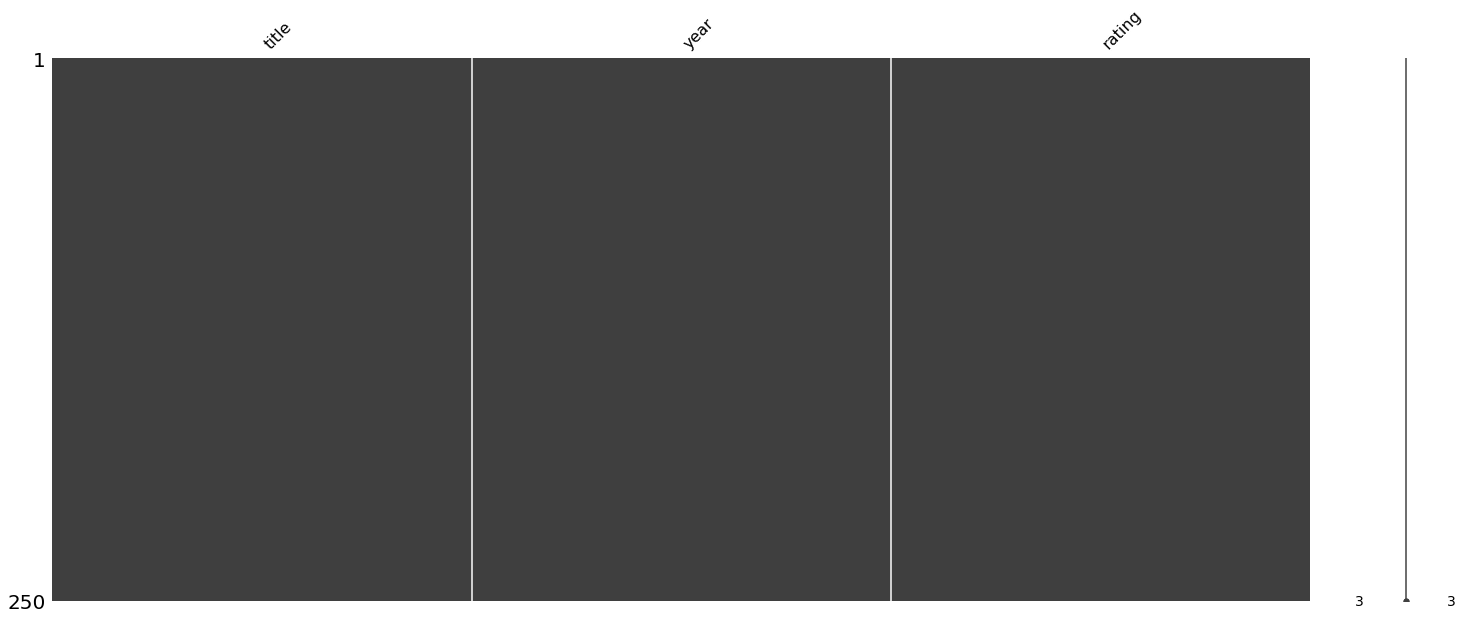

In [17]:
missingno.matrix(data)

In [18]:
# Setting an option to display all the rows so that it becomes easier to look through

pd.set_option("max_rows", None)
data

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
5,Schindler s List,1993,8.9
6,The Lord of the Rings The Return of the King,2003,8.9
7,Pulp Fiction,1994,8.9
8,The Lord of the Rings The Fellowship of the Ring,2001,8.8
9,Il buono il brutto il cattivo,1966,8.8


In [19]:
data['year'].nunique

<bound method IndexOpsMixin.nunique of 0      1994
1      1972
2      2008
3      1974
4      1957
5      1993
6      2003
7      1994
8      2001
9      1966
10     1994
11     1999
12     2010
13     2002
14     1980
15     1999
16     1990
17     1975
18     1995
19     1954
20     1946
21     1991
22     1998
23     2002
24     1997
25     1999
26     1977
27     2014
28     1991
29     1985
30     2001
31     1960
32     1994
33     2002
34     2019
35     1994
36     2000
37     1998
38     1995
39     2006
40     2006
41     1942
42     2014
43     2011
44     1936
45     1968
46     1962
47     1988
48     1979
49     1954
50     1931
51     2000
52     1979
53     1988
54     1981
55     2012
56     2008
57     2021
58     2006
59     1950
60     1980
61     1957
62     1940
63     2018
64     1957
65     1986
66     1999
67     2012
68     1964
69     2019
70     2018
71     2003
72     1995
73     1995
74     1984
75     2017
76     2009
77     1981
78     2019
79     1997
8

# Rating Density Plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='year'>

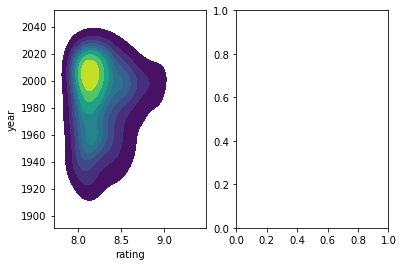

In [45]:
fig, ax =plt.subplots(1,2)

sns.kdeplot(data['rating'],data['year'], shade=True, cmap='viridis', ax=ax[0])

The above graph is very bright in the 2000s section, which indicated the presence of a good amount of films from those years

In [20]:
# Counting the number of films in the Top 250 list according to year

data['year'].value_counts()

1995    8
2004    7
2009    6
1957    6
2019    6
2003    6
2000    5
1999    5
1998    5
1997    5
1994    5
1975    5
2007    5
2010    5
2011    5
2001    5
2014    5
2013    4
2018    4
2016    4
1993    4
1988    4
2015    4
2002    4
2006    4
1980    4
1954    4
1959    4
1950    3
2017    3
1992    3
1991    3
2012    3
1939    3
1986    3
1985    3
1984    3
1940    3
1979    3
2005    3
1982    3
1976    3
1966    3
1962    3
2008    3
2021    2
2020    2
1952    2
1931    2
1996    2
1953    2
1963    2
1965    2
1990    2
1948    2
1989    2
1946    2
1968    2
1942    2
1973    2
1983    2
1961    2
1981    2
1974    2
1960    2
1921    1
1987    1
1924    1
1925    1
1926    1
1927    1
1928    1
1934    1
1936    1
1941    1
1944    1
1949    1
1955    1
1958    1
1964    1
1967    1
1971    1
1972    1
1977    1
1978    1
2022    1
Name: year, dtype: int64

The Films released in 1995 are Se7en, The Usual Suspects, Braveheart, Toy Story, Heat, Casino, Before Sunrise and La Haine. These hold an average rating of 8.275 

<AxesSubplot:>

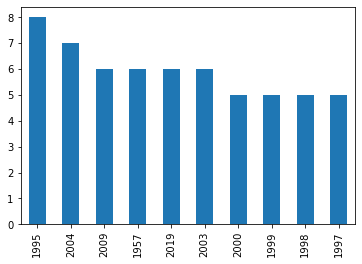

In [36]:
data['year'].value_counts().head(10).plot.bar()

The year 1995 is leading with the most number of top rated films followed closely by the year 2004

In [21]:
# Information about films from the year 1995, in which highest number (8) of the top rated films were released

movies_1995 = data[data['year']==1995]
print(movies_1995)

                  title  year  rating
18                Se7en  1995     8.6
38   The Usual Suspects  1995     8.5
72           Braveheart  1995     8.3
73            Toy Story  1995     8.3
113                Heat  1995     8.2
135              Casino  1995     8.2
186      Before Sunrise  1995     8.1
243            La haine  1995     8.0


(7.9, 8.8)

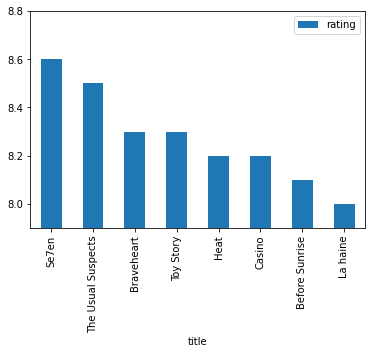

In [22]:
plot_1995 = movies_1995.plot.bar(x = 'title', y = 'rating', fontsize='10')
plot_1995.set_ylim(7.9,8.8)

In [23]:
movies_1995.mean()

year      1995.000
rating       8.275
dtype: float64

In [24]:
# Information about films from the year 2004, in which second highest number (7) of the top rated films were released

movies_2004 = data[data['year']==2004]
print(movies_2004)

                                     title  year  rating
89   Eternal Sunshine of the Spotless Mind  2004     8.3
127                          Der Untergang  2004     8.2
163                   Hauru no ugoku shiro  2004     8.1
172                    Million Dollar Baby  2004     8.1
207                           Hotel Rwanda  2004     8.1
225                        The Incredibles  2004     8.0
227                          Before Sunset  2004     8.0


(7.9, 8.5)

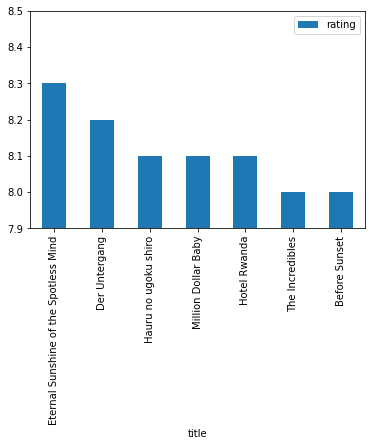

In [25]:
plot_2004 = movies_2004.plot.bar(x = 'title', y = 'rating', fontsize='10')
plot_2004.set_ylim(7.9,8.5)

In [26]:
movies_2004.mean()

year      2004.000000
rating       8.114286
dtype: float64

The Films released in 2004 are Eternal Sunshine of the Spotless Mind, Der Untergang, Hauru no ugoku shiro, Million Dollar Baby, Hotel Rwanda, The Incredibles and Before Sunset. These hold an average rating of 8.114286 

In [27]:
# Information about the films from 2022

print(data[data['year']==2022])

          title  year  rating
102  The Batman  2022     8.2


The Batman is the only film that made it to the IMDB Top 250 from the current year, 2022

In [28]:
# Information about films which hold a rating greater than 9.0 on IMDB

print(data[data['rating']>=9.0])

                      title  year  rating
0  The Shawshank Redemption  1994     9.2
1             The Godfather  1972     9.2
2           The Dark Knight  2008     9.0
3    The Godfather  Part II  1974     9.0
4              12 Angry Men  1957     9.0


(7.9, 9.3)

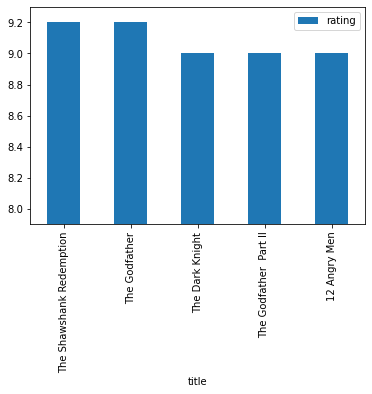

In [29]:
plot_over_nine = data[data['rating']>=9.0].plot.bar(x='title', y='rating')
plot_over_nine.set_ylim(7.9,9.3)

Only five films - The Shawshank Redemption, The Godfather, The Dark Knight, The Godfather Part II & 12 Angry Men have a rating equal to or greater than 9.0

In [30]:
data['rating'].value_counts()

8.1    67
8.2    47
8.0    35
8.3    35
8.5    20
8.4    18
8.6    11
8.7     5
8.8     4
9.0     3
8.9     3
9.2     2
Name: rating, dtype: int64

<AxesSubplot:>

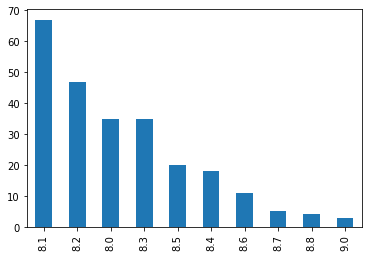

In [37]:
data['rating'].value_counts().head(10).plot.bar()

<AxesSubplot:xlabel='count', ylabel='rating'>

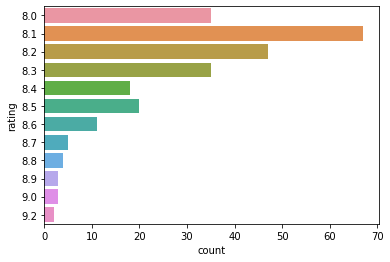

In [31]:
# Plot representing the number of films having the corrensponding rating vs the rating
 
sns.countplot(y=data['rating'])

67 films in the IMDB Top 250 have a rating equal to 8.1. 
Only 5 films have a rating over 9.0